In [1]:

#  CSV erkennen by David Maksimovic 24.06.2019
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
#import keras

#from keras import regularizers
from tensorflow import keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout,LeakyReLU, Activation,ZeroPadding2D, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Concatenate, Reshape, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
import time
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pydot_ng as pydot
import numpy as np
import glob
import os
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import DivergingNorm
from matplotlib import ticker, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from numpy import sqrt


if keras.backend.backend() == 'tensorflow':
    from keras import backend as K
    import tensorflow as tf
    from keras.utils.conv_utils import convert_kernel
    
    
########### Normalisieren ###########

#Ist schon normalisiert

Using TensorFlow backend.


In [4]:

########### Daten laden ###########
X= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/X_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
Y= pickle.load(open("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/pickle/Y_Beamlike_PID_gn_PMT160andLAPPD1x1_120k_Files_mitTopBottom.pickle","rb"))
XMRD = np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/MRD.npy")
ParentE= np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/EnergyMother.npy")
MuonE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/EnergyMuon.npy",allow_pickle=True)
EE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/EnergyElectron.npy",allow_pickle=True)
VisibleE=np.load("C:/Users/Deep Thought/Documents/Python/CNN_Masterarbeit/BeamlikePI/Temp/VisibleEnergy.npy",allow_pickle=True)

Def Confuion Matrix

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
training_data = list(zip(X, Y,XMRD,VisibleE,ParentE))

random.shuffle(training_data)

for sample in Y[:5]:
    print("Eintrag \n", sample)

X1 =[]
Y1 =[]
XMRD1=[]
VisibleE1=[]
ParentE1=[]

for x in training_data[:85000]:
    
    X1.append(x[0])
    Y1.append(x[1])
    XMRD1.append(x[2])
    VisibleE1.append(x[3])
    ParentE1.append(x[4])
    
XTraining = np.array(X1)
YTraining = np.array(Y1)
XMRDTraining= np.array(XMRD1)
VisibleETraining=np.array(VisibleE1)
ParentETraining=np.array(ParentE1)


X2 =[]
Y2 =[]
XMRD2=[]
VisibleE2=[]
ParentE2=[]


for x in training_data[85000:105000]:
    
    X2.append(x[0])
    Y2.append(x[1])
    XMRD2.append(x[2])
    VisibleE2.append(x[3])
    ParentE2.append(x[4])
    
XVal = np.array(X2)
YVal = np.array(Y2)
XMRDVal=np.array(XMRD2)
VisibleEVal=np.array(VisibleE2)
ParentEVal=np.array(ParentE2)

X3 =[]
Y3 =[]
XMRD3=[]
VisibleE3=[]
ParentE3=[]

for x in training_data[105000:]:
    
    X3.append(x[0])
    Y3.append(x[1])
    XMRD3.append(x[2])
    VisibleE3.append(x[3])
    ParentE3.append(x[4])
    
XTest = np.array(X3)
YTest = np.array(Y3)
XMRDTest=np.array(XMRD3)
VisibleETest=np.array(VisibleE3)
ParentETest=np.array(ParentE3)

print(XTraining.shape,XVal.shape,XTest.shape)
print(XTest.shape,YTest.shape,XMRDTest.shape,VisibleETest.shape,ParentETest.shape)
del X,Y,X1,X2,X3,Y1,Y2,Y3,XMRD3,XMRD2,XMRD1,ParentE1,ParentE2,ParentE3,VisibleE3,VisibleE2,VisibleE1

Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
Eintrag 
 [1 0]
(85000, 10, 24, 2) (20000, 10, 24, 2) (15005, 10, 24, 2)
(15005, 10, 24, 2) (15005, 2) (15005, 6) (15005, 2) (15005,)


# Train Data

# Without MRD

In [7]:
Tiefe = [1,2,3,4]
Batchgrose = [128]
Breite = [10,50,160,400] #500 ,600, 700,
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\PerceptronPMT+LAPPD\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()

            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,YVal)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        #checkpoint,
                        tensorboard 
            ],
          epochs= 30)



Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 24, 2)]       0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 480)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 500)               240500    
_________________________________________________________________
batch_normalization_40 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_40 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 500)               250500    
_________________________________________________________________
batch_normalization_41 (Batc (None, 500)               2000  

Epoch 7/30
85000/85000 [==============================] - 5s 55us/sample - loss: 0.3899 - acc: 0.8220 - val_loss: 0.3991 - val_acc: 0.8174
Epoch 8/30
85000/85000 [==============================] - 5s 54us/sample - loss: 0.3781 - acc: 0.8276 - val_loss: 0.3923 - val_acc: 0.8210
Epoch 9/30
85000/85000 [==============================] - 4s 52us/sample - loss: 0.3628 - acc: 0.8365 - val_loss: 0.3905 - val_acc: 0.8227
Epoch 10/30
85000/85000 [==============================] - 4s 50us/sample - loss: 0.3513 - acc: 0.8438 - val_loss: 0.3659 - val_acc: 0.8373
Epoch 11/30
85000/85000 [==============================] - 4s 49us/sample - loss: 0.3418 - acc: 0.8472 - val_loss: 0.3875 - val_acc: 0.8224
Epoch 12/30
85000/85000 [==============================] - 4s 48us/sample - loss: 0.3277 - acc: 0.8545 - val_loss: 0.3782 - val_acc: 0.8299
Epoch 13/30
85000/85000 [==============================] - 4s 48us/sample - loss: 0.3187 - acc: 0.8595 - val_loss: 0.3764 - val_acc: 0.8357
Epoch 14/30
85000/85000

85000/85000 [==============================] - 5s 55us/sample - loss: 0.2249 - acc: 0.9051 - val_loss: 0.3717 - val_acc: 0.8458
Epoch 25/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.2179 - acc: 0.9084 - val_loss: 0.3767 - val_acc: 0.8511
Epoch 26/30
85000/85000 [==============================] - 4s 53us/sample - loss: 0.2139 - acc: 0.9100 - val_loss: 0.3859 - val_acc: 0.8522
Epoch 27/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.2089 - acc: 0.9133 - val_loss: 0.3960 - val_acc: 0.8429
Epoch 28/30
85000/85000 [==============================] - 5s 53us/sample - loss: 0.2035 - acc: 0.9145 - val_loss: 0.3929 - val_acc: 0.8470
Epoch 29/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.1988 - acc: 0.9166 - val_loss: 0.3895 - val_acc: 0.8487
Epoch 30/30
85000/85000 [==============================] - 4s 51us/sample - loss: 0.1956 - acc: 0.9183 - val_loss: 0.3936 - val_acc: 0.8504
Model: "Model"
_________________

Epoch 1/30
85000/85000 [==============================] - 7s 80us/sample - loss: 0.5789 - acc: 0.7205 - val_loss: 0.5203 - val_acc: 0.7426
Epoch 2/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4846 - acc: 0.7666 - val_loss: 0.4572 - val_acc: 0.7821
Epoch 3/30
85000/85000 [==============================] - 5s 64us/sample - loss: 0.4543 - acc: 0.7864 - val_loss: 0.4617 - val_acc: 0.7823
Epoch 4/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.4275 - acc: 0.8028 - val_loss: 0.4139 - val_acc: 0.8077
Epoch 5/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.4126 - acc: 0.8106 - val_loss: 0.4354 - val_acc: 0.8015
Epoch 6/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.3957 - acc: 0.8220 - val_loss: 0.3895 - val_acc: 0.8212
Epoch 7/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.3818 - acc: 0.8281 - val_loss: 0.3856 - val_acc: 0.8287
Epoch 8/30
85000/85000 [===

85000/85000 [==============================] - 6s 66us/sample - loss: 0.2886 - acc: 0.8747 - val_loss: 0.3580 - val_acc: 0.8464
Epoch 16/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.2801 - acc: 0.8800 - val_loss: 0.3531 - val_acc: 0.8488
Epoch 17/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.2718 - acc: 0.8839 - val_loss: 0.3546 - val_acc: 0.8508
Epoch 18/30
85000/85000 [==============================] - 6s 67us/sample - loss: 0.2637 - acc: 0.8876 - val_loss: 0.3718 - val_acc: 0.8447
Epoch 19/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.2541 - acc: 0.8912 - val_loss: 0.3553 - val_acc: 0.8540
Epoch 20/30
85000/85000 [==============================] - 6s 65us/sample - loss: 0.2460 - acc: 0.8964 - val_loss: 0.3758 - val_acc: 0.8487
Epoch 21/30
85000/85000 [==============================] - 5s 63us/sample - loss: 0.2393 - acc: 0.8992 - val_loss: 0.3505 - val_acc: 0.8555
Epoch 22/30
85000/85000 [=======

85000/85000 [==============================] - 6s 76us/sample - loss: 0.2389 - acc: 0.9004 - val_loss: 0.3509 - val_acc: 0.8560
Epoch 27/30
85000/85000 [==============================] - 6s 76us/sample - loss: 0.2385 - acc: 0.9010 - val_loss: 0.3539 - val_acc: 0.8554
Epoch 28/30
85000/85000 [==============================] - 6s 76us/sample - loss: 0.2297 - acc: 0.9046 - val_loss: 0.3481 - val_acc: 0.8547
Epoch 29/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.2245 - acc: 0.9060 - val_loss: 0.3481 - val_acc: 0.8602
Epoch 30/30
85000/85000 [==============================] - 6s 76us/sample - loss: 0.2214 - acc: 0.9087 - val_loss: 0.3775 - val_acc: 0.8493
Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 24, 2)]       0         
_________________________________________________________________
flatten_23 (Flatten)         (Non

Epoch 1/30
85000/85000 [==============================] - 8s 99us/sample - loss: 0.5818 - acc: 0.7193 - val_loss: 0.5086 - val_acc: 0.7487
Epoch 2/30
85000/85000 [==============================] - 7s 78us/sample - loss: 0.4917 - acc: 0.7651 - val_loss: 0.5599 - val_acc: 0.7538
Epoch 3/30
85000/85000 [==============================] - 7s 77us/sample - loss: 0.4523 - acc: 0.7902 - val_loss: 0.4426 - val_acc: 0.7901
Epoch 4/30
85000/85000 [==============================] - 7s 80us/sample - loss: 0.4262 - acc: 0.8055 - val_loss: 0.4214 - val_acc: 0.8045
Epoch 5/30
85000/85000 [==============================] - 7s 79us/sample - loss: 0.4074 - acc: 0.8158 - val_loss: 0.4051 - val_acc: 0.8144
Epoch 6/30
85000/85000 [==============================] - 7s 80us/sample - loss: 0.3927 - acc: 0.8241 - val_loss: 0.4115 - val_acc: 0.8191
Epoch 7/30
85000/85000 [==============================] - 7s 80us/sample - loss: 0.3795 - acc: 0.8301 - val_loss: 0.4344 - val_acc: 0.8069
Epoch 8/30
85000/85000 [===

# Best Model

In [8]:
Tiefe = [3]
Batchgrose = [128]
Breite = [400]
    
for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\PerceptronPMT+LAPPD\{}'.format(NAME))


            
            
            inputs = tf.keras.Input(shape=XTraining.shape[1:], name='img')
            x= layers.Flatten()(inputs)
            for d in range(deep):
                
                x = layers.Dense(breit, activation='sigmoid')(x)
                x = layers.BatchNormalization()(x)
                x = layers.Dropout(0.2)(x)
                
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs, outputs, name='Model')
            model.summary()
            filepath="Perceptron-PMT+LAPPD(1x1)-PID-val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            model.compile(
            optimizer='adam',
            #optimizer = keras.optimizers.RMSprop(1e-3),
            loss='categorical_crossentropy',
            metrics=['acc'])

            history=model.fit(XTraining,YTraining,
                              validation_data=(XVal,YVal)
                              ,batch_size=batch,
                                shuffle=True,
                                class_weight='balanced',
            callbacks=[
                        #monitor,
                        checkpoint,
                        #tensorboard 
            ],
          epochs= 80)



Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 10, 24, 2)]       0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 480)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 400)               192400    
_________________________________________________________________
batch_normalization_67 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_67 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 400)               160400    
_________________________________________________________________
batch_normalization_68 (Batc (None, 400)               1600  

84224/85000 [============================>.] - ETA: 0s - loss: 0.2804 - acc: 0.8801
Epoch 00020: val_acc did not improve from 0.85250
85000/85000 [==============================] - 5s 64us/sample - loss: 0.2806 - acc: 0.8800 - val_loss: 0.3494 - val_acc: 0.8475
Epoch 21/80
84352/85000 [============================>.] - ETA: 0s - loss: 0.2765 - acc: 0.8821
Epoch 00021: val_acc did not improve from 0.85250
85000/85000 [==============================] - 5s 65us/sample - loss: 0.2765 - acc: 0.8820 - val_loss: 0.3491 - val_acc: 0.8464
Epoch 22/80
84224/85000 [============================>.] - ETA: 0s - loss: 0.2678 - acc: 0.8852
Epoch 00022: val_acc did not improve from 0.85250
85000/85000 [==============================] - 6s 66us/sample - loss: 0.2682 - acc: 0.8850 - val_loss: 0.3646 - val_acc: 0.8494
Epoch 23/80
84480/85000 [============================>.] - ETA: 0s - loss: 0.2609 - acc: 0.8893
Epoch 00023: val_acc did not improve from 0.85250
85000/85000 [==============================]

84992/85000 [============================>.] - ETA: 0s - loss: 0.1723 - acc: 0.9292
Epoch 00048: val_acc did not improve from 0.86430
85000/85000 [==============================] - 5s 65us/sample - loss: 0.1723 - acc: 0.9292 - val_loss: 0.3779 - val_acc: 0.8643
Epoch 49/80
84736/85000 [============================>.] - ETA: 0s - loss: 0.1710 - acc: 0.9299
Epoch 00049: val_acc did not improve from 0.86430
85000/85000 [==============================] - 6s 65us/sample - loss: 0.1710 - acc: 0.9299 - val_loss: 0.3767 - val_acc: 0.8612
Epoch 50/80
84608/85000 [============================>.] - ETA: 0s - loss: 0.1692 - acc: 0.9300
Epoch 00050: val_acc did not improve from 0.86430
85000/85000 [==============================] - 6s 66us/sample - loss: 0.1692 - acc: 0.9300 - val_loss: 0.3759 - val_acc: 0.8625
Epoch 51/80
84480/85000 [============================>.] - ETA: 0s - loss: 0.1687 - acc: 0.9315
Epoch 00051: val_acc did not improve from 0.86430
85000/85000 [==============================]

Epoch 77/80
84352/85000 [============================>.] - ETA: 0s - loss: 0.1258 - acc: 0.9507
Epoch 00077: val_acc did not improve from 0.86720
85000/85000 [==============================] - 6s 66us/sample - loss: 0.1259 - acc: 0.9506 - val_loss: 0.4245 - val_acc: 0.8621
Epoch 78/80
84864/85000 [============================>.] - ETA: 0s - loss: 0.1255 - acc: 0.9498
Epoch 00078: val_acc did not improve from 0.86720
85000/85000 [==============================] - 6s 65us/sample - loss: 0.1256 - acc: 0.9497 - val_loss: 0.4353 - val_acc: 0.8641
Epoch 79/80
84992/85000 [============================>.] - ETA: 0s - loss: 0.1256 - acc: 0.9493
Epoch 00079: val_acc did not improve from 0.86720
85000/85000 [==============================] - 5s 65us/sample - loss: 0.1257 - acc: 0.9493 - val_loss: 0.4342 - val_acc: 0.8610
Epoch 80/80
83968/85000 [============================>.] - ETA: 0s - loss: 0.1271 - acc: 0.9487
Epoch 00080: val_acc did not improve from 0.86720
85000/85000 [===================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


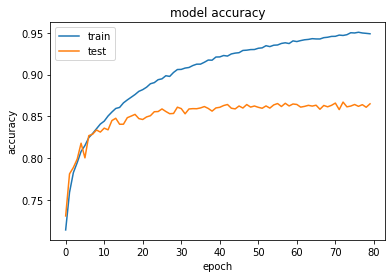

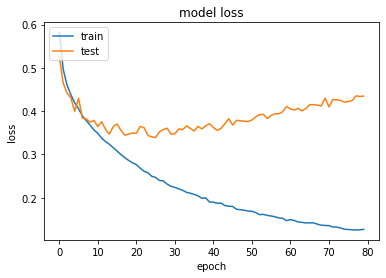

Ende des Versuchs: 


In [9]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Ende des Versuchs: ")

In [10]:
model = tf.keras.models.load_model("Perceptron-PMT+LAPPD(1x1)-PID-val-acc_0.87.model")
score = model.evaluate(XTest, YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

W0608 13:14:22.498964 16216 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0608 13:14:22.499963 16216 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\Tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0608 13:14:22.501964 16216 deprecation.py:506] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_6

Test score:  0.43442266997358314
Test accuracy:  0.862046


[[6156 1362]
 [ 708 6779]]
[[0.8188348  0.1811652 ]
 [0.09456391 0.90543609]]


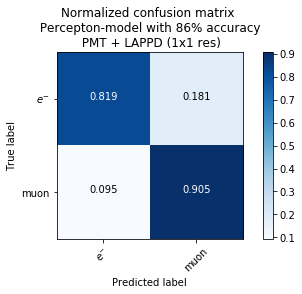

In [13]:
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict(XTest, batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Percepton-model with 86% accuracy \n PMT + LAPPD (1x1 res)')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()

# MRD Model

Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 8s 93us/sample - loss: 0.5522 - acc: 0.7266 - val_loss: 0.4946 - val_acc: 0.7574
Epoch 2/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4943 - acc: 0.7606 - val_loss: 0.4506 - val_acc: 0.7861
Epoch 3/30
85000/85000 [==============================] - 6s 73us/sample - loss: 0.4577 - acc: 0.7842 - val_loss: 0.4221 - val_acc: 0.8078
Epoch 4/30
85000/85000 [==============================] - 6s 73us/sample - loss: 0.4279 - acc: 0.8002 - val_loss: 0.3938 - val_acc: 0.8188
Epoch 5/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4045 - acc: 0.8134 - val_loss: 0.3779 - val_acc: 0.8290
Epoch 6/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.3892 - acc: 0.8236 - val_loss: 0.3712 - val_acc: 0.8349
Epoch 7/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.3797 - acc: 0.8281 - val_loss: 0.

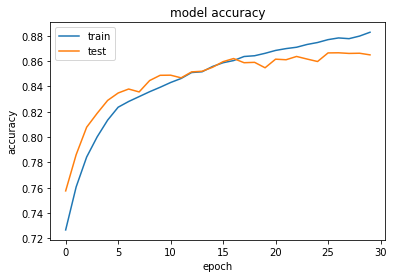

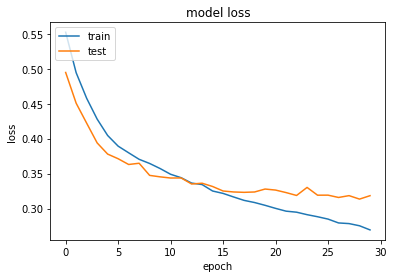

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 8s 96us/sample - loss: 0.5495 - acc: 0.7324 - val_loss: 0.4873 - val_acc: 0.7631
Epoch 2/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4748 - acc: 0.7743 - val_loss: 0.4421 - val_acc: 0.7874
Epoch 3/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4359 - acc: 0.7975 - val_loss: 0.4087 - val_acc: 0.8141
Epoch 4/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4081 - acc: 0.8123 - val_loss: 0.3930 - val_acc: 0.8203
Epoch 5/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.3889 - acc: 0.8224 - val_loss: 0.3691 - val_acc: 0.8358
Epoch 6/30
85000/85000 [==============================] - 6s 73us/sample - loss: 0.3745 - acc: 0.8311 - val_loss: 0.3766 - val_acc: 0.8322
Epoch 7/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.3627 - acc: 0

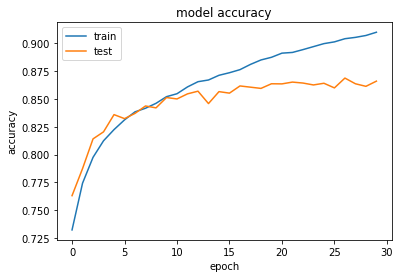

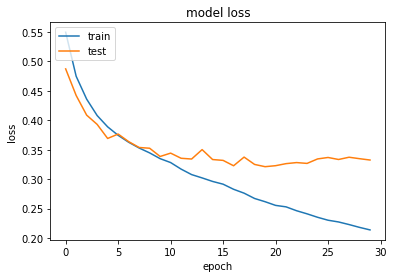

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 8s 94us/sample - loss: 0.5570 - acc: 0.7306 - val_loss: 0.4719 - val_acc: 0.7725
Epoch 2/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.4718 - acc: 0.7757 - val_loss: 0.4468 - val_acc: 0.7880
Epoch 3/30
85000/85000 [==============================] - 6s 70us/sample - loss: 0.4371 - acc: 0.7970 - val_loss: 0.4251 - val_acc: 0.8018
Epoch 4/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4094 - acc: 0.8122 - val_loss: 0.3910 - val_acc: 0.8267
Epoch 5/30
85000/85000 [==============================] - 6s 71us/sample - loss: 0.3910 - acc: 0.8224 - val_loss: 0.3841 - val_acc: 0.8314
Epoch 6/30
85000/85000 [==============================] - 6s 70us/sample - loss: 0.3759 - acc: 0.8296 - val_loss: 0.3829 - val_acc: 0.8303
Epoch 7/30
85000/85000 [==============================] - 6s 70us/sample - loss: 0.3633 - acc: 0

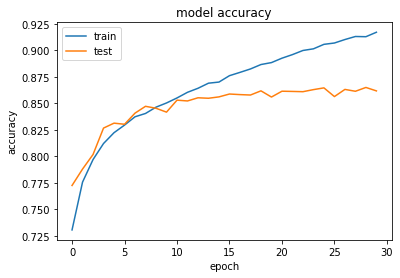

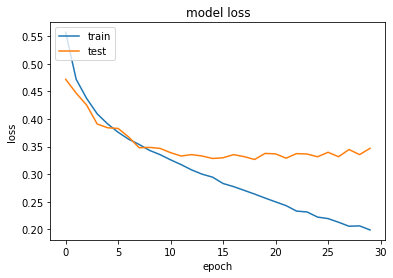

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 8s 95us/sample - loss: 0.5621 - acc: 0.7335 - val_loss: 0.4699 - val_acc: 0.7745
Epoch 2/30
85000/85000 [==============================] - 6s 74us/sample - loss: 0.4672 - acc: 0.7784 - val_loss: 0.4216 - val_acc: 0.8036
Epoch 3/30
85000/85000 [==============================] - 6s 73us/sample - loss: 0.4351 - acc: 0.7984 - val_loss: 0.4122 - val_acc: 0.8090
Epoch 4/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.4120 - acc: 0.8098 - val_loss: 0.3930 - val_acc: 0.8155
Epoch 5/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.3926 - acc: 0.8220 - val_loss: 0.3753 - val_acc: 0.8296
Epoch 6/30
85000/85000 [==============================] - 6s 72us/sample - loss: 0.3809 - acc: 0.8273 - val_loss: 0.3821 - val_acc: 0.8248
Epoch 7/30
85000/85000 [==============================] - 6s 74us/sample - loss: 0.3665 - acc: 0

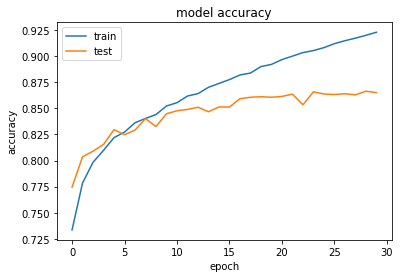

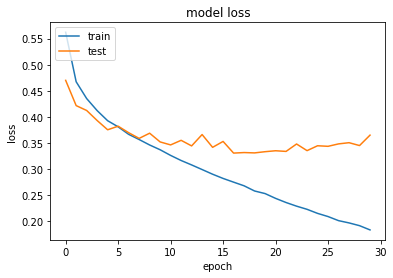

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 10s 114us/sample - loss: 0.5595 - acc: 0.7255 - val_loss: 0.4913 - val_acc: 0.7599
Epoch 2/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.4947 - acc: 0.7631 - val_loss: 0.4900 - val_acc: 0.7681
Epoch 3/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.4570 - acc: 0.7853 - val_loss: 0.4330 - val_acc: 0.7977
Epoch 4/30
85000/85000 [==============================] - 8s 89us/sample - loss: 0.4264 - acc: 0.8032 - val_loss: 0.4012 - val_acc: 0.8179
Epoch 5/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.4057 - acc: 0.8158 - val_loss: 0.3799 - val_acc: 0.8292
Epoch 6/30
85000/85000 [==============================] - 7s 87us/sample - loss: 0.3903 - acc: 0.8220 - val_loss: 0.3734 - val_acc: 0.8321
Epoch 7/30
85000/85000 [==============================] - 8s 90us/sample - loss: 0.3788 - acc:

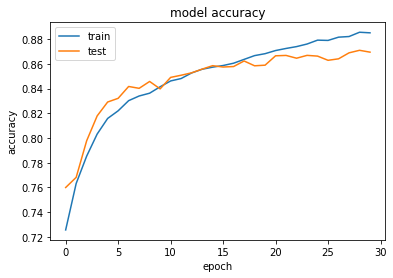

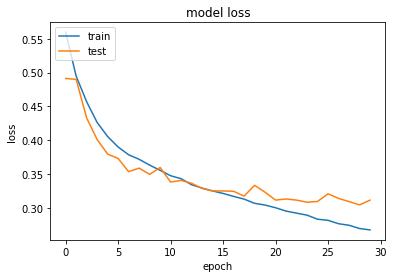

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 10s 116us/sample - loss: 0.5556 - acc: 0.7329 - val_loss: 0.4856 - val_acc: 0.7625
Epoch 2/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.4711 - acc: 0.7787 - val_loss: 0.4348 - val_acc: 0.7984
Epoch 3/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.4361 - acc: 0.7986 - val_loss: 0.4081 - val_acc: 0.8149
Epoch 4/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.4098 - acc: 0.8128 - val_loss: 0.3803 - val_acc: 0.8280
Epoch 5/30
85000/85000 [==============================] - 8s 90us/sample - loss: 0.3904 - acc: 0.8231 - val_loss: 0.3804 - val_acc: 0.8277
Epoch 6/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3780 - acc: 0.8285 - val_loss: 0.3662 - val_acc: 0.8392
Epoch 7/30
85000/85000 [==============================] - 7s 88us/sample - loss: 0.3629 - acc:

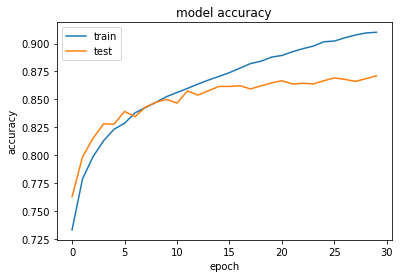

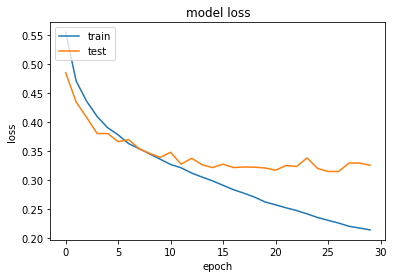

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 10s 118us/sample - loss: 0.5477 - acc: 0.7371 - val_loss: 0.4642 - val_acc: 0.7800
Epoch 2/30
85000/85000 [==============================] - 8s 91us/sample - loss: 0.4686 - acc: 0.7815 - val_loss: 0.4335 - val_acc: 0.8037
Epoch 3/30
85000/85000 [==============================] - 8s 90us/sample - loss: 0.4340 - acc: 0.8004 - val_loss: 0.4231 - val_acc: 0.8059
Epoch 4/30
85000/85000 [==============================] - 8s 90us/sample - loss: 0.4109 - acc: 0.8127 - val_loss: 0.3877 - val_acc: 0.8240
Epoch 5/30
85000/85000 [==============================] - 8s 91us/sample - loss: 0.3926 - acc: 0.8238 - val_loss: 0.3770 - val_acc: 0.8318
Epoch 6/30
85000/85000 [==============================] - 8s 92us/sample - loss: 0.3787 - acc: 0.8295 - val_loss: 0.3791 - val_acc: 0.8281
Epoch 7/30
85000/85000 [==============================] - 8s 90us/sample - loss: 0.3653 - acc:

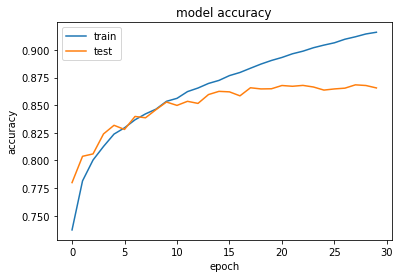

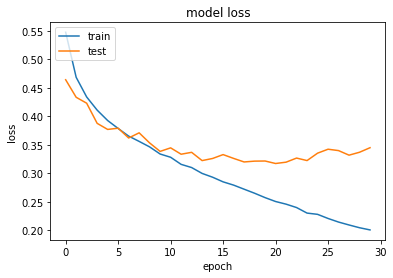

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 10s 119us/sample - loss: 0.5613 - acc: 0.7371 - val_loss: 0.4636 - val_acc: 0.7788
Epoch 2/30
85000/85000 [==============================] - 8s 91us/sample - loss: 0.4592 - acc: 0.7851 - val_loss: 0.4334 - val_acc: 0.7970
Epoch 3/30
85000/85000 [==============================] - 8s 90us/sample - loss: 0.4323 - acc: 0.8031 - val_loss: 0.4328 - val_acc: 0.8005
Epoch 4/30
85000/85000 [==============================] - 8s 90us/sample - loss: 0.4107 - acc: 0.8132 - val_loss: 0.3969 - val_acc: 0.8202
Epoch 5/30
85000/85000 [==============================] - 8s 91us/sample - loss: 0.3931 - acc: 0.8223 - val_loss: 0.3827 - val_acc: 0.8225
Epoch 6/30
85000/85000 [==============================] - 8s 91us/sample - loss: 0.3794 - acc: 0.8296 - val_loss: 0.3695 - val_acc: 0.8390
Epoch 7/30
85000/85000 [==============================] - 8s 90us/sample - loss: 0.3641 - acc:

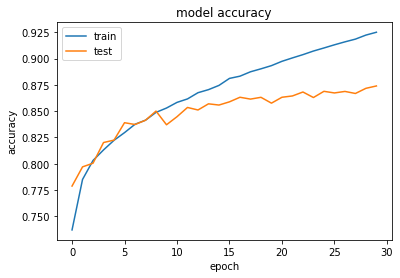

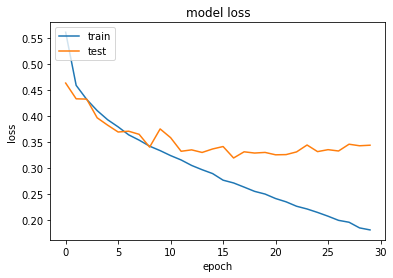

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 12s 137us/sample - loss: 0.5657 - acc: 0.7236 - val_loss: 0.5210 - val_acc: 0.7406
Epoch 2/30
85000/85000 [==============================] - 9s 106us/sample - loss: 0.5000 - acc: 0.7590 - val_loss: 0.4714 - val_acc: 0.7741
Epoch 3/30
85000/85000 [==============================] - 9s 105us/sample - loss: 0.4613 - acc: 0.7834 - val_loss: 0.4412 - val_acc: 0.7933
Epoch 4/30
85000/85000 [==============================] - 9s 105us/sample - loss: 0.4307 - acc: 0.8003 - val_loss: 0.4069 - val_acc: 0.8137
Epoch 5/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.4076 - acc: 0.8144 - val_loss: 0.3822 - val_acc: 0.8283
Epoch 6/30
85000/85000 [==============================] - 9s 105us/sample - loss: 0.3950 - acc: 0.8229 - val_loss: 0.3800 - val_acc: 0.8280
Epoch 7/30
85000/85000 [==============================] - 9s 105us/sample - loss: 0.3867 

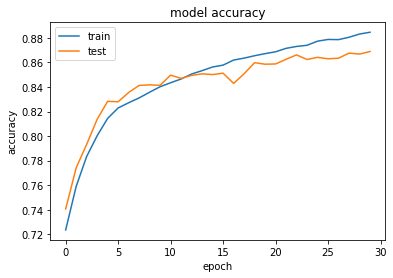

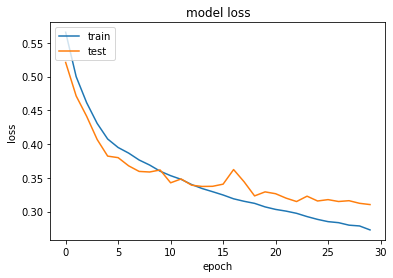

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 12s 139us/sample - loss: 0.5594 - acc: 0.7297 - val_loss: 0.4840 - val_acc: 0.7656
Epoch 2/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.4826 - acc: 0.7738 - val_loss: 0.4428 - val_acc: 0.7945
Epoch 3/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.4384 - acc: 0.7987 - val_loss: 0.4162 - val_acc: 0.8094
Epoch 4/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.4126 - acc: 0.8127 - val_loss: 0.3839 - val_acc: 0.8265
Epoch 5/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.3960 - acc: 0.8215 - val_loss: 0.3946 - val_acc: 0.8223
Epoch 6/30
85000/85000 [==============================] - 9s 107us/sample - loss: 0.3821 - acc: 0.8293 - val_loss: 0.3736 - val_acc: 0.8329
Epoch 7/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.3690 

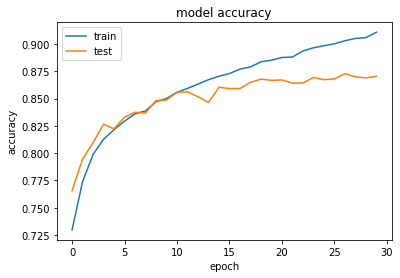

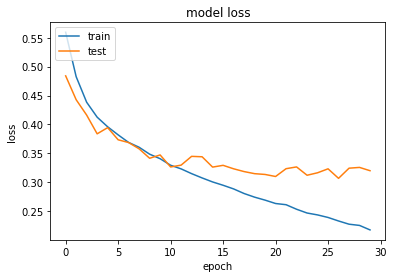

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 12s 140us/sample - loss: 0.5638 - acc: 0.7323 - val_loss: 0.4885 - val_acc: 0.7688
Epoch 2/30
85000/85000 [==============================] - 9s 111us/sample - loss: 0.4700 - acc: 0.7807 - val_loss: 0.4376 - val_acc: 0.8005
Epoch 3/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.4374 - acc: 0.8006 - val_loss: 0.4157 - val_acc: 0.8094
Epoch 4/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.4115 - acc: 0.8143 - val_loss: 0.4058 - val_acc: 0.8173
Epoch 5/30
85000/85000 [==============================] - 9s 109us/sample - loss: 0.3964 - acc: 0.8221 - val_loss: 0.3971 - val_acc: 0.8223
Epoch 6/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.3838 - acc: 0.8290 - val_loss: 0.3929 - val_acc: 0.8221
Epoch 7/30
85000/85000 [==============================] - 9s 108us/sample - loss: 0.3717 

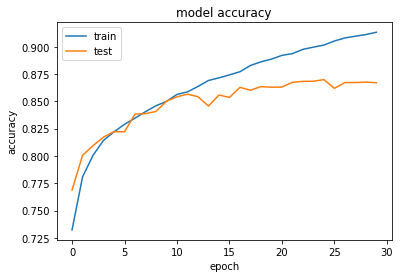

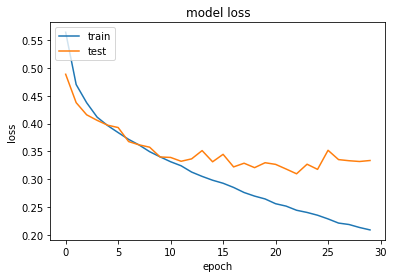

Ende des Versuchs: 
Train on 85000 samples, validate on 20000 samples
Epoch 1/30
85000/85000 [==============================] - 12s 144us/sample - loss: 0.5697 - acc: 0.7332 - val_loss: 0.4780 - val_acc: 0.7764
Epoch 2/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4683 - acc: 0.7820 - val_loss: 0.4581 - val_acc: 0.7877
Epoch 3/30
85000/85000 [==============================] - 10s 113us/sample - loss: 0.4356 - acc: 0.8031 - val_loss: 0.4333 - val_acc: 0.8077
Epoch 4/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4145 - acc: 0.8131 - val_loss: 0.3975 - val_acc: 0.8164
Epoch 5/30
85000/85000 [==============================] - 9s 110us/sample - loss: 0.4013 - acc: 0.8218 - val_loss: 0.3909 - val_acc: 0.8230
Epoch 6/30
85000/85000 [==============================] - 10s 112us/sample - loss: 0.3874 - acc: 0.8278 - val_loss: 0.3846 - val_acc: 0.8313
Epoch 7/30
85000/85000 [==============================] - 9s 111us/sample - loss: 0.375

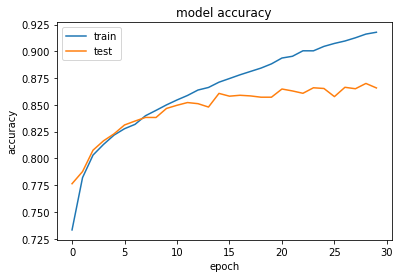

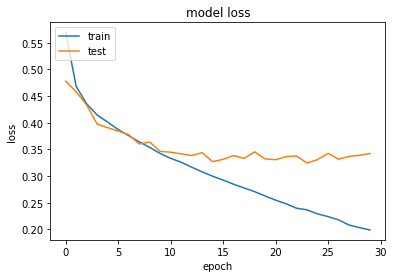

Ende des Versuchs: 


In [16]:
Tiefe = [2,3,4]
Batchgrose = [128]
Breite = [160,400,500,700]


for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\PerceptronPMT_LAPPD_MRD\{}'.format(NAME))

            inputDet = tf.keras.Input(shape=XTraining.shape[1:], name='PMT')
            inputMRD = tf.keras.Input(shape=(5), name='MRD')
            x = layers.Flatten()(inputDet)
            x = layers.concatenate([x, inputMRD]) #38


            ##### Dense #####
            for d in range(deep):
                x= layers.Dense(breit, activation='sigmoid')(x)
                x= layers.BatchNormalization()(x)
                x= layers.Dropout(0.2)(x)



            ##### Output #####
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs=[inputDet, inputMRD], outputs=[outputs], name='Model')
            #model.summary()
            model.compile(
                        optimizer='adam',
                        #optimizer = keras.optimizers.RMSprop(1e-3),
                        loss='categorical_crossentropy',
                        metrics=['acc'])


            #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="API-Det+MRD-improvement_EnergyTester-val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            #model Fit



            history = model.fit([XTraining,XMRDTraining[:,:5]],
                                YTraining,
                                batch_size=100,
                                #validation_split=0.2,

                                validation_data=([XVal,XMRDVal[:,:5]],YVal),
                                epochs= 30,

                                shuffle=True,
                                class_weight='balanced',
                                callbacks=[
                                            #monitor,
                                            #checkpoint,
                                            tensorboard 
                                ],
                                verbose=1)

            # list all data in history
            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

            print("Ende des Versuchs: ")

Train on 85000 samples, validate on 20000 samples
Epoch 1/80
84500/85000 [============================>.] - ETA: 0s - loss: 0.5628 - acc: 0.7363
Epoch 00001: val_acc improved from -inf to 0.77870, saving model to Perceptron-Det+MRD-improvement-val-acc_0.78.model
85000/85000 [==============================] - 18s 215us/sample - loss: 0.5624 - acc: 0.7364 - val_loss: 0.4728 - val_acc: 0.7787
Epoch 2/80
84200/85000 [============================>.] - ETA: 0s - loss: 0.4653 - acc: 0.7837
Epoch 00002: val_acc improved from 0.77870 to 0.79420, saving model to Perceptron-Det+MRD-improvement-val-acc_0.79.model
85000/85000 [==============================] - 9s 100us/sample - loss: 0.4649 - acc: 0.7840 - val_loss: 0.4441 - val_acc: 0.7942
Epoch 3/80
84400/85000 [============================>.] - ETA: 0s - loss: 0.4331 - acc: 0.8013
Epoch 00003: val_acc improved from 0.79420 to 0.81950, saving model to Perceptron-Det+MRD-improvement-val-acc_0.82.model
85000/85000 [==============================] -

Epoch 28/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1933 - acc: 0.9199
Epoch 00028: val_acc did not improve from 0.86730
85000/85000 [==============================] - 8s 95us/sample - loss: 0.1933 - acc: 0.9199 - val_loss: 0.3734 - val_acc: 0.8650
Epoch 29/80
84400/85000 [============================>.] - ETA: 0s - loss: 0.1883 - acc: 0.9217
Epoch 00029: val_acc did not improve from 0.86730
85000/85000 [==============================] - 8s 95us/sample - loss: 0.1881 - acc: 0.9218 - val_loss: 0.3452 - val_acc: 0.8655
Epoch 30/80
84700/85000 [============================>.] - ETA: 0s - loss: 0.1830 - acc: 0.9244
Epoch 00030: val_acc improved from 0.86730 to 0.86785, saving model to Perceptron-Det+MRD-improvement-val-acc_0.87.model
85000/85000 [==============================] - 8s 97us/sample - loss: 0.1830 - acc: 0.9245 - val_loss: 0.3444 - val_acc: 0.8679
Epoch 31/80
84900/85000 [============================>.] - ETA: 0s - loss: 0.1800 - acc: 0.9244
Epoch 00031

84200/85000 [============================>.] - ETA: 0s - loss: 0.0995 - acc: 0.9608
Epoch 00057: val_acc did not improve from 0.87165
85000/85000 [==============================] - 8s 98us/sample - loss: 0.0993 - acc: 0.9608 - val_loss: 0.4562 - val_acc: 0.8684
Epoch 58/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.0959 - acc: 0.9627
Epoch 00058: val_acc improved from 0.87165 to 0.87205, saving model to Perceptron-Det+MRD-improvement-val-acc_0.87.model
85000/85000 [==============================] - 9s 101us/sample - loss: 0.0959 - acc: 0.9627 - val_loss: 0.4655 - val_acc: 0.8720
Epoch 59/80
84400/85000 [============================>.] - ETA: 0s - loss: 0.0943 - acc: 0.9641
Epoch 00059: val_acc did not improve from 0.87205
85000/85000 [==============================] - 8s 95us/sample - loss: 0.0944 - acc: 0.9641 - val_loss: 0.4732 - val_acc: 0.8709
Epoch 60/80
84800/85000 [============================>.] - ETA: 0s - loss: 0.0922 - acc: 0.9638
Epoch 00060: val_acc d

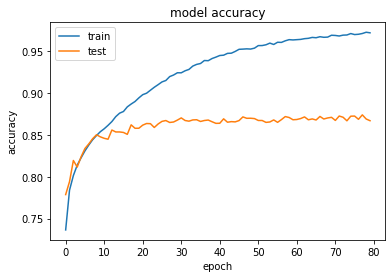

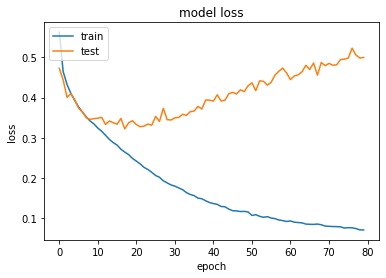

Ende des Versuchs: 


In [17]:
Tiefe = [3]
Batchgrose = [128]
Breite = [700]


for deep in Tiefe:
    for batch in Batchgrose:
        for breit in Breite:

            
            
            NAME ="Perceptron-PMT-Charge-MuEl-{}-deep-{}-nodes-{}-batchsize".format(deep, breit, batch) #,int(time.time())
            tensorboard = TensorBoard(log_dir = 'logs\PerceptronPMT_LAPPD_MRD\{}'.format(NAME))

            inputDet = tf.keras.Input(shape=XTraining.shape[1:], name='PMT')
            inputMRD = tf.keras.Input(shape=(5), name='MRD')
            x = layers.Flatten()(inputDet)
            x = layers.concatenate([x, inputMRD]) #38


            ##### Dense #####
            for d in range(deep):
                x= layers.Dense(breit, activation='sigmoid')(x)
                x= layers.BatchNormalization()(x)
                x= layers.Dropout(0.2)(x)



            ##### Output #####
            outputs = layers.Dense(2, activation='softmax')(x)
            model = tf.keras.Model(inputs=[inputDet, inputMRD], outputs=[outputs], name='Model')
            #model.summary()
            model.compile(
                        optimizer='adam',
                        #optimizer = keras.optimizers.RMSprop(1e-3),
                        loss='categorical_crossentropy',
                        metrics=['acc'])


            #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
            filepath="Perceptron-Det+MRD-improvement-val-acc_{val_acc:.2f}.model" 
            checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
            monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=False)
            #model Fit



            history = model.fit([XTraining,XMRDTraining[:,:5]],
                                YTraining,
                                batch_size=100,
                                #validation_split=0.2,

                                validation_data=([XVal,XMRDVal[:,:5]],YVal),
                                epochs= 80,

                                shuffle=True,
                                class_weight='balanced',
                                callbacks=[
                                            #monitor,
                                            checkpoint,
                                            #tensorboard 
                                ],
                                verbose=1)

            # list all data in history
            print(history.history.keys())
            # summarize history for accuracy
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
            # summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()

            print("Ende des Versuchs: ")

In [20]:
model = tf.keras.models.load_model("Perceptron-Det+MRD-improvement-val-acc_0.87.model")
score = model.evaluate([XTest,XMRDTest[:,:5]], YTest, verbose=False) 
model.metrics_names
print('Test score: ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score:  0.5132648409902553
Test accuracy:  0.8673109


[[6257 1261]
 [ 730 6757]]
[[0.83226922 0.16773078]
 [0.09750234 0.90249766]]


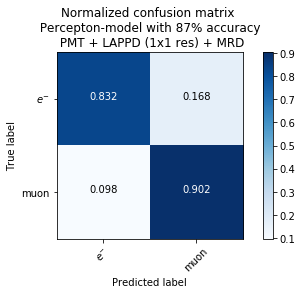

In [23]:
rounded_labels =np.argmax(YTest, axis=1)
y_prob = np.array(model.predict([XTest,XMRDTest[:,:5]], batch_size=128, verbose=0))
y_classes = y_prob.argmax(axis=-1)
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)
# Reshape into 2 x 2 matrix
cm = cm.reshape((2,2))
 
class_names = [r"$e^{-}$", "muon"]
 
    
# Plot normalized confusion matrix
f=plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix \n Percepton-model with 87% accuracy \n PMT + LAPPD (1x1 res) + MRD')
#f.savefig("Confusion-CNN-85-Prozent-MultiChannel-2-conv-130-nodes-2-dense.pdf",format ="pdf", bbox_inches='tight') 
plt.show()